In [ ]:
import pandas as pd
import numpy as np

frame = pd.read_csv("../WA_Fn-UseC_-Telco-Customer-Churn.csv")
frame.dtypes

# 汇总统计
frame.describe(include='all')
frame

# 整体流失情况
frame['是否流失'].drop_duplicates()
# 流失人数，非流失人数
chrun1 = frame[frame['是否流失'] == 'Yes']['是否流失'].count()  # 1869
chrun2 = frame[frame['是否流失'] == 'No']['是否流失'].count()  # 5147
# 流失率
chrun1
chrun_rate = chrun1 / frame.count()
chrun_rate

# 性别统计
frame['性别'].drop_duplicates()
male = frame[frame['性别'] == 'Male']['性别'].count()
female = frame[frame['性别'] == 'Female']['性别'].count()
print(male, female)  # 3555 3488
# 男女比例
male_rate = male / len(frame)
female_rate = female / len(frame)  # (0.504756495811444, 0.495243504188556)
# 女性流失率
lose_users = frame[frame['是否流失'] == 'Yes']
unlose_users = frame[frame['是否流失'] == 'No']
female_lose_count = lose_users[lose_users['性别'] == 'Female']['性别'].count()
male_lose_count = lose_users[lose_users['性别'] == 'Male']['性别'].count()
female_lose_count, male_lose_count  # (939, 930)
male_lose_rate = male_lose_count / male
female_lose_rate = female_lose_count / female
male_lose_rate, female_lose_rate  # 0.2616033755274262, 0.26920871559633025)


def eda_calculate(column, types):
    """
    计算类别数据对应条数、占总数比例、对应流失率
    param @column: str，列表
    param @types: list，类别数据
    """
    print("\n==========当前列标签：", column, types)

    # 1.计算类别数据对应的个数
    res_list = []
    rate_list = []
    for t in types:
        res = len(frame[frame[column] == t])
        # 3.计算类别数据对应的流失率
        rate = len(lose_users[lose_users[column] == t]) / res

        # 存储到字典，方便匹配信息
        res_list.append({t: res})
        rate_list.append({t: rate})

        # 2.预览各类别数据对应的个数、占总数比例
    print("********数据条数********")
    for res in res_list:  # res = {男 ：3400}
        print(res, "占总数比例", list(res.values())[0] / len(frame))

    # 4.预览个类别数据对应的流失率、前者和后者的倍数关系
    print("********流失率********")
    for rate in rate_list:
        before = list(rate.values())[0]
        index = rate_list.index(rate) + 1
        print(rate)

        if index < len(rate_list):
            after = list(rate_list[index].values())[0]
            print("前者和后者的倍数关系", before / after)


# 创建通用函数：提取列标签、提取对应类别数据
columns = ['通话服务', '多线程', '网络服务', '在线安全', '在线备份',
           '设备安全', '技术支持', '流媒体电视', '流媒体电影']
for c in columns:
    types = frame[c].drop_duplicates().tolist()
    eda_calculate(c, types)

'''
==========当前列标签： 通话服务 ['No', 'Yes']
********数据条数********
{'No': 682} 占总数比例 0.09683373562402385
{'Yes': 6361} 占总数比例 0.9031662643759761
********流失率********
{'No': 0.24926686217008798}
前者和后者的倍数关系 0.9332469159881869
{'Yes': 0.2670963684955196}

==========当前列标签： 多线程 ['No phone service', 'No', 'Yes']
********数据条数********
{'No phone service': 682} 占总数比例 0.09683373562402385
{'No': 3390} 占总数比例 0.48132897912821243
{'Yes': 2971} 占总数比例 0.42183728524776376
********流失率********
{'No phone service': 0.24926686217008798}
前者和后者的倍数关系 0.9953058454141323
{'No': 0.2504424778761062}
前者和后者的倍数关系 0.8753701197293076
{'Yes': 0.286098956580276}

==========当前列标签： 网络服务 ['DSL', 'Fiber optic', 'No']
********数据条数********
{'DSL': 2421} 占总数比例 0.34374556297032516
{'Fiber optic': 3096} 占总数比例 0.4395854039471816
{'No': 1526} 占总数比例 0.21666903308249325
********流失率********
{'DSL': 0.1895910780669145}
前者和后者的倍数关系 0.4525628201196355
{'Fiber optic': 0.4189276485788114}
前者和后者的倍数关系 5.657376917975807
{'No': 0.07404980340760157}

==========当前列标签： 在线安全 ['No', 'Yes', 'No internet service']
********数据条数********
{'No': 3498} 占总数比例 0.4966633536845094
{'Yes': 2019} 占总数比例 0.2866676132329973
{'No internet service': 1526} 占总数比例 0.21666903308249325
********流失率********
{'No': 0.4176672384219554}
前者和后者的倍数关系 2.8585428961828065
{'Yes': 0.14611193660227836}
前者和后者的倍数关系 1.9731576571245732
{'No internet service': 0.07404980340760157}

==========当前列标签： 在线备份 ['Yes', 'No', 'No internet service']
********数据条数********
{'Yes': 2429} 占总数比例 0.3448814425670879
{'No': 3088} 占总数比例 0.43844952435041884
{'No internet service': 1526} 占总数比例 0.21666903308249325
********流失率********
{'Yes': 0.21531494442157267}
前者和后者的倍数关系 0.5392478089000945
{'No': 0.39928756476683935}
前者和后者的倍数关系 5.392148883488468
{'No internet service': 0.07404980340760157}

==========当前列标签： 设备安全 ['No', 'Yes', 'No internet service']
********数据条数********
{'No': 3095} 占总数比例 0.43944341899758627
{'Yes': 2422} 占总数比例 0.3438875479199205
{'No internet service': 1526} 占总数比例 0.21666903308249325
********流失率********
{'No': 0.3912762520193861}
前者和后者的倍数关系 1.7388460227356939
{'Yes': 0.2250206440957886}
前者和后者的倍数关系 3.038774361859941
{'No internet service': 0.07404980340760157}

==========当前列标签： 技术支持 ['No', 'Yes', 'No internet service']
********数据条数********
{'No': 3473} 占总数比例 0.4931137299446259
{'Yes': 2044} 占总数比例 0.2902172369728809
{'No internet service': 1526} 占总数比例 0.21666903308249325
********流失率********
{'No': 0.4163547365390153}
前者和后者的倍数关系 2.7452551015669266
{'Yes': 0.15166340508806261}
前者和后者的倍数关系 2.0481270457025094
{'No internet service': 0.07404980340760157}

==========当前列标签： 流媒体电视 ['No', 'Yes', 'No internet service']
********数据条数********
{'No': 2810} 占总数比例 0.3989777083629135
{'Yes': 2707} 占总数比例 0.38435325855459324
{'No internet service': 1526} 占总数比例 0.21666903308249325
********流失率********
{'No': 0.33523131672597867}
前者和后者的倍数关系 1.1148294525518727
{'Yes': 0.30070188400443293}
前者和后者的倍数关系 4.0608059733695985
{'No internet service': 0.07404980340760157}

==========当前列标签： 流媒体电影 ['No', 'Yes', 'No internet service']
********数据条数********
{'No': 2785} 占总数比例 0.39542808462303
{'Yes': 2732} 占总数比例 0.3879028822944768
{'No internet service': 1526} 占总数比例 0.21666903308249325
********流失率********
{'No': 0.33680430879712747}
前者和后者的倍数关系 1.12487698243735
{'Yes': 0.29941434846266474}
前者和后者的倍数关系 4.043418546495809
{'No internet service': 0.07404980340760157}
'''

<Axes: >

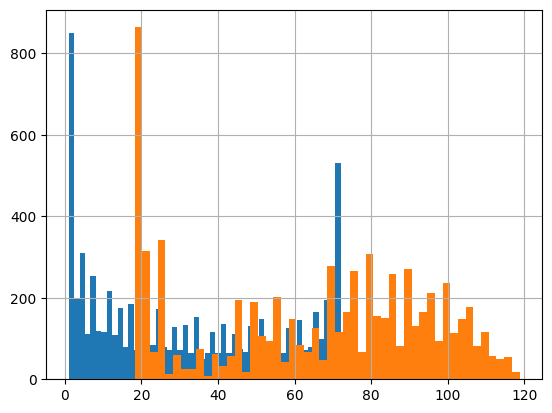

In [4]:
# 用户行为
import pandas as pd
import numpy as np

data = pd.read_csv('../WA_Fn-UseC_-Telco-Customer-Churn.csv')
data = data.replace(' ', np.nan).dropna()

# 转换数据类型
data['总消费'] = data['总消费'].astype('float64')
data['在网时长'].hist(bins=50)
data['月消费'].hist(bins=50)